In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Data Exploratory for Bank Marketing

In [178]:
#Read the CSV File of Breast Cancer Dataset
df = pd.read_csv(r"datasets\Bank Marketing\data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Data pre-processing and cleaning

In [180]:

df.drop(df.index[df["job"] == "unknown"], inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [181]:
# settings age into groups 1 : <20, 2 : >=20 < 30, 3 : >= 30 < 40, 4 : >= 40 < 50, 5 : >= 50 < 60, 6 : >=60 <70, 7 :  >= 70 < 80, 8 : >= 80 <=90

df["age"] = np.where((df["age"] < 20) , 1, df["age"])
df["age"] = np.where((df["age"] >= 20) & (df["age"] <30) , 2,df["age"] )
df["age"] = np.where((df["age"] >= 30) & (df["age"] <40) , 3,df["age"] )
df["age"] = np.where((df["age"] >= 40) & (df["age"] <50) , 4,df["age"] )
df["age"] = np.where((df["age"] >= 50) & (df["age"] <60) , 5,df["age"] )
df["age"] = np.where((df["age"] >= 60) & (df["age"] <70) , 6,df["age"] )
df["age"] = np.where((df["age"] >= 70) & (df["age"] <80) , 7,df["age"] )
df["age"] = np.where((df["age"] >= 80) & (df["age"] <90) , 8,df["age"] )
df["age"] = np.where((df["age"] >= 90) & (df["age"] <100) , 9,df["age"] )

Converted categorical attributes into numerical for correlation studies

|column_title|Attribute 
|---|---|
|y | no : 0 , yes : 1 <br>
age | "<20" : 1, "20-29" : 2,"30-39" : 3, "40-49" : 4, "50-59" : 5, "60-69" : 6, "70-79" : 7 , "80-89" : 8 ,"90-99" : 9 <br>
job | "admin." : 1 , "unknown" : 0 , "unemployed" : 2 , "management" : 3, "housemaid" : 4 , "entrepreneur" : 5, "student" : 6,"blue-collar" : 7, "self-employed":8, "retired" : 9, "technician" : 10 ,"services" : 11 <br>
marital| "married" : 1 , "divorced" : 2, "single" : 3 <br>
education | "secondary" : 2 ,"primary" : 1 ,"tertiary":3 , "unknown" :0 <br>
balance |  numeric <br>
default | no : 0 , yes : 1 <br>
loan | no : 0 , yes : 1 <br>
housing| no : 0 , yes : 1
contact| "unknown" :0 , "telephone" : 1 , "cellular" : 2 <br>
day|numeric
month| "jan" : 1, "feb" : 2 , "mar" : 3 , "apr" : 4, "may" : 5, "jun" : 6 ,"jul" : 7 , "aug" : 8, "sep" :9 , "oct":10, "nov" : 11, "dec" : 12 <br>
duration| numeric
campaign | numeric
pdays | numeric
previous| numeric
poutcome| "unknown" :0, "success" : 1 ,"failure" : 2 ,"other" : 3

In [182]:
newValues = {"admin." : 1 , "unknown" : 0 , "unemployed" : 2 , "management" : 3, "housemaid" : 4 , "entrepreneur" : 5, "student" : 6,"blue-collar" : 7, "self-employed":8, "retired" : 9, "technician" : 10 ,"services" : 11, 
             "married" : 1 , "divorced" : 2, "single" : 3, "secondary" : 2 ,"primary" : 1 ,"tertiary":3, 
             "yes" : 1, "no" : 0 , "telephone" : 1 , "cellular" : 2, 
             "jan" : 1, "feb" : 2 , "mar" : 3 , "apr" : 4, "may" : 5, "jun" : 6 ,"jul" : 7 , "aug" : 8, "sep" :9 , "oct":10, "nov" : 11, "dec" : 12, 
             "success" : 1 ,"failure" : 2 ,"other" : 3}
df.replace(newValues, inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,5,3,1,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,4,10,3,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,3,5,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,4,7,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
5,3,3,1,3,0,231,1,0,0,5,5,139,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,10,1,3,0,825,0,0,2,17,11,977,3,-1,0,0,1
45207,7,9,2,1,0,1729,0,0,2,17,11,456,2,-1,0,0,1
45208,7,9,1,2,0,5715,0,0,2,17,11,1127,5,184,3,1,1
45209,5,7,1,2,0,668,0,0,1,17,11,508,4,-1,0,0,0


The goal of the predictive algorithm is to predict the value of y on whether the client has subscribed for a term deposit based on the respective attributes. 
Some factors to affect subscribing of term deposit could be housing, loan ,default, marital, job, age, education.

0    39668
1     5255
Name: y, dtype: int64


<AxesSubplot: >

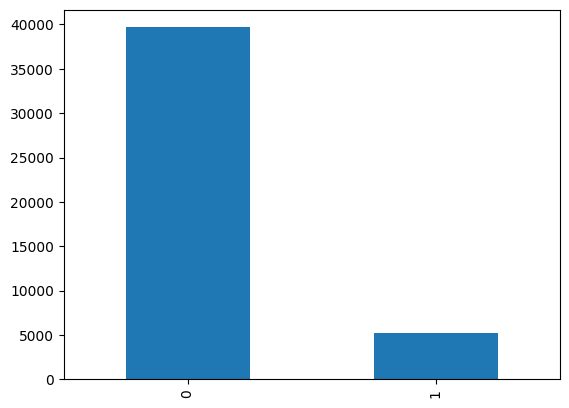

In [183]:
print(df["y"].value_counts())
plotdata = df["y"].value_counts()
plotdata.plot(kind ="bar")

|column_title|Attribute 
|---|---|
|y | no : 0 , yes : 1 <br>


Based on the distribution of the dataset, there are more "No" to fixed deposits than "yes".

3    18037
4    11558
5     8315
2     5210
6     1210
7      417
8      120
1       47
9        9
Name: age, dtype: int64


<AxesSubplot: xlabel='age', ylabel='Count'>

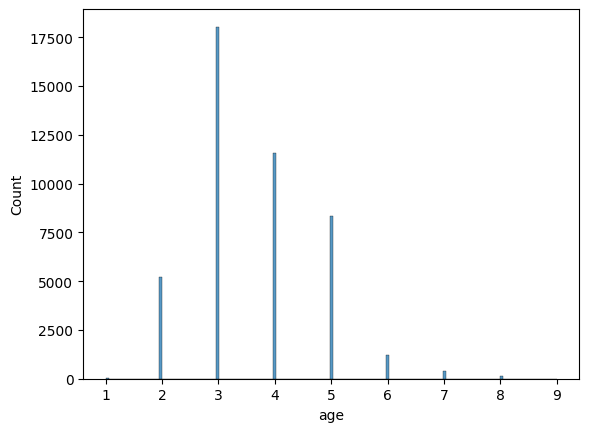

In [184]:
print(df["age"].value_counts())
sns.histplot(df["age"])

|column_title|Attribute 
|---|---|
age | "<20" : 1, "20-29" : 2,"30-39" : 3, "40-49" : 4, "50-59" : 5, "60-69" : 6, "70-79" : 7 , "80-89" : 8 ,"90-99" : 9 <br>


Based on the distribution of the datasets, clients aging from 30 to 39 are the largest in numbers. There may be some suggestions that age is a factor to having subcribe a term deposit.

7     9732
3     9458
10    7597
1     5171
11    4154
9     2264
8     1579
5     1487
2     1303
4     1240
6      938
Name: job, dtype: int64


<AxesSubplot: >

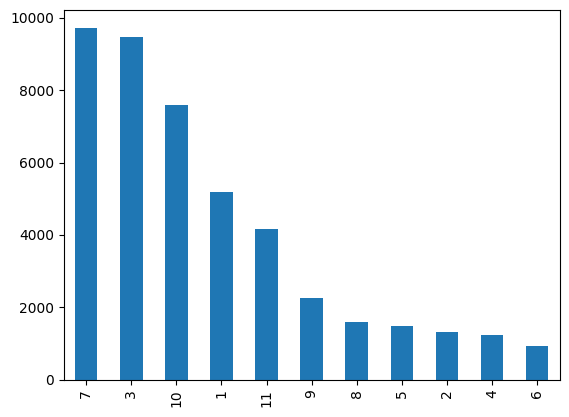

In [185]:
print(df["job"].value_counts())
plotdata = df["job"].value_counts()
plotdata.plot(kind ="bar")

|column_title|Attribute 
|---|---|
job | "admin." : 1 , "unknown" : 0 , "unemployed" : 2 , "management" : 3, "housemaid" : 4 , "entrepreneur" : 5, "student" : 6,"blue-collar" : 7, "self-employed":8, "retired" : 9, "technician" : 10 ,"services" : 11 <br>

1    27011
3    12722
2     5190
Name: marital, dtype: int64


<AxesSubplot: >

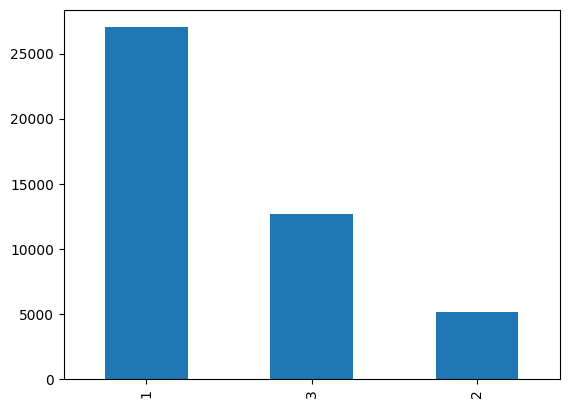

In [186]:
print(df["marital"].value_counts())
plotdata = df["marital"].value_counts()
plotdata.plot(kind ="bar")

|column_title|Attribute 
|---|---|
marital| "married" : 1 , "divorced" : 2, "single" : 3 <br>


Majority of the dataset are married. Does their relationship status affect the prediction of subscribing to term deposit?

2    23131
3    13262
1     6800
0     1730
Name: education, dtype: int64


<AxesSubplot: >

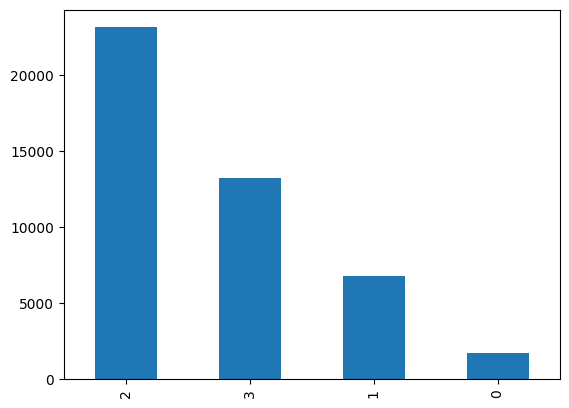

In [187]:
print(df["education"].value_counts())
plotdata = df["education"].value_counts()
plotdata.plot(kind ="bar")

|column_title|Attribute 
|---|---|
education | "secondary" : 2 ,"primary" : 1 ,"tertiary":3 , "unknown" :0 <br>


Majority of the education are secondary, does higher education equate to subscribing to term deposit??


0    44110
1      813
Name: default, dtype: int64


<AxesSubplot: >

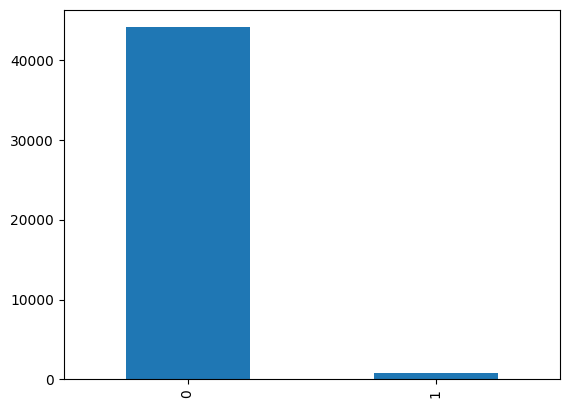

In [188]:
print(df["default"].value_counts())
plotdata = df["default"].value_counts()
plotdata.plot(kind ="bar")

|column_title|Attribute 
|---|---|
default | no : 0 , yes : 1 <br>


Majority of the dataset do not have credit as default

1    25104
0    19819
Name: housing, dtype: int64


<AxesSubplot: >

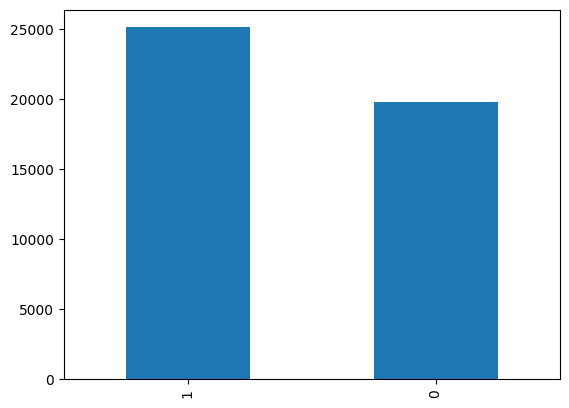

In [189]:
print(df["housing"].value_counts())
plotdata = df["housing"].value_counts()
plotdata.plot(kind ="bar")

|column_title|Attribute 
|---|---|
housing| no : 0 , yes : 1

Majority of the dataset owns a housing, does having a house may lead to subcribing to term deposit?

0    37683
1     7240
Name: loan, dtype: int64


<AxesSubplot: >

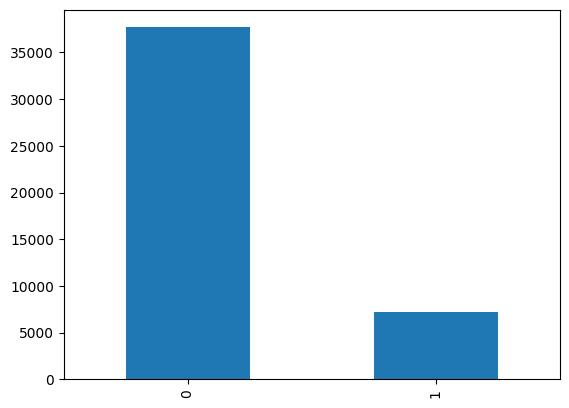

In [190]:
print(df["loan"].value_counts())
plotdata = df["loan"].value_counts()
plotdata.plot(kind ="bar")

|column_title|Attribute 
|---|---|
housing| no : 0 , yes : 1

Majority of the dataset do not have a loan, does having a loan lead to subcribing to term deposit?

In [191]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.047815,-0.364025,-0.159979,-0.017264,0.095760,-0.174199,-0.015239,-0.016839,-0.004520,0.101692,-0.006613,0.005838,-0.021603,0.002972,-0.009649,0.023609
job,0.047815,1.000000,-0.033503,-0.198380,0.001223,-0.033242,0.032269,0.026746,-0.045382,0.006532,-0.012868,0.010947,0.010651,-0.007879,-0.016847,-0.013808,-0.025713
marital,-0.364025,-0.033503,1.000000,0.137104,0.009358,-0.020538,-0.021679,-0.047482,0.041171,-0.007946,-0.068985,0.022695,-0.028271,0.029303,0.015709,0.029863,0.065541
education,-0.159979,-0.198380,0.137104,1.000000,-0.009803,0.052495,-0.047240,0.000955,0.149765,0.020018,0.070351,0.002355,0.001570,0.005272,0.024183,0.025453,0.052462
default,-0.017264,0.001223,0.009358,-0.009803,1.000000,-0.066762,-0.006835,0.077196,-0.015256,0.009520,0.015175,-0.009964,0.017215,-0.030105,-0.018381,-0.035130,-0.022395
balance,0.095760,-0.033242,-0.020538,0.052495,-0.066762,1.000000,-0.068381,-0.084233,0.027385,0.004849,0.094416,0.021629,-0.015042,0.003684,0.016936,0.022807,0.052814
housing,-0.174199,0.032269,-0.021679,-0.047240,-0.006835,-0.068381,1.000000,0.038911,-0.191163,-0.028951,-0.174004,0.004787,-0.022609,0.123421,0.036571,0.087232,-0.139996
loan,-0.015239,0.026746,-0.047482,0.000955,0.077196,-0.084233,0.038911,1.000000,0.010110,0.010897,0.022040,-0.012966,0.010553,-0.023462,-0.011370,-0.020286,-0.068741
contact,-0.016839,-0.045382,0.041171,0.149765,-0.015256,0.027385,-0.191163,0.010110,1.000000,0.027343,0.173921,0.019763,-0.019333,0.244584,0.147555,0.269979,0.147678
day,-0.004520,0.006532,-0.007946,0.020018,0.009520,0.004849,-0.028951,0.010897,0.027343,1.000000,0.103337,-0.030302,0.161667,-0.093094,-0.051672,-0.081406,-0.028653


<AxesSubplot: >

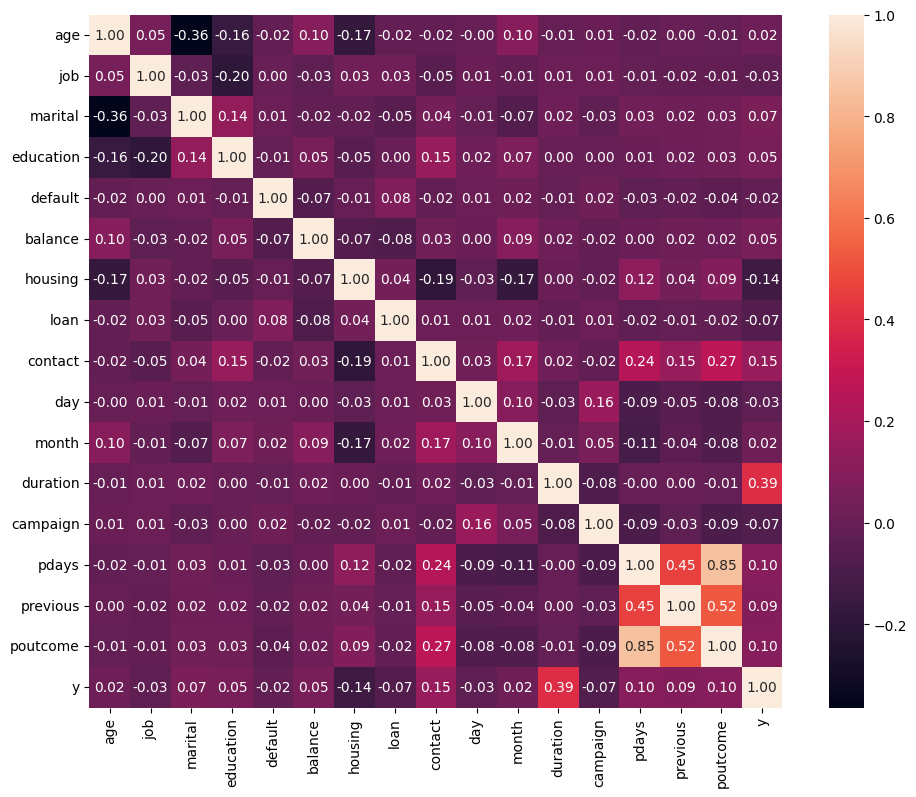

In [192]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax= 1, annot = True, square = True, fmt= ".2f")

We will remove all negative correlations of y as they do not correlate to our prediction value

In [193]:
def cleanDf(argument):
    df.drop(argument,axis = 1, inplace = True)
    df.dropna()

In [194]:
cleanDf("job")
cleanDf("default")
cleanDf("housing")
cleanDf("loan")
cleanDf("day")
cleanDf("campaign")
df

,age,marital,education,balance,contact,month,duration,pdays,previous,poutcome,y
0,5,1,3,2143,0,5,261,-1,0,0,0
1,4,3,2,29,0,5,151,-1,0,0,0
2,3,1,2,2,0,5,76,-1,0,0,0
3,4,1,0,1506,0,5,92,-1,0,0,0
5,3,1,3,231,0,5,139,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,5,1,3,825,2,11,977,-1,0,0,1
45207,7,2,1,1729,2,11,456,-1,0,0,1
45208,7,1,2,5715,2,11,1127,184,3,1,1
45209,5,1,2,668,1,11,508,-1,0,0,0


In [195]:
#Extract the attributes into a list
def extract_df_col(df):
    df = df.copy()
    class_column = df.pop('y')
    df['y'] = class_column
    record_list = []
    for col in df.columns:
        record_list.append(col)
    print(record_list)
    return (record_list)


In [196]:
bank_list = extract_df_col(df)
with open("datasets\Bank Marketing\cleaned_attributes.txt", "w") as output:
    output.write(str(bank_list))

['age', 'marital', 'education', 'balance', 'contact', 'month', 'duration', 'pdays', 'previous', 'poutcome', 'y']


## Creating Testing and Training Sets

In [197]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dectree = DecisionTreeClassifier()

In [198]:
y = df["y"]
x = df.drop("y", axis = 1)

In [199]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.25, random_state = 2)

print("Train set: \t", xTrain.shape,yTrain.shape)
print("Test set: \t", xTest.shape,yTest.shape)

Train set: 	 (33692, 10) (33692,)
Test set: 	 (11231, 10) (11231,)


### Classification Decision Tree Method

In [200]:
dectree.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [201]:
dt_pred = dectree.predict(xTest)
print(dt_pred)

[0 0 0 ... 0 0 0]


In [202]:
bank_dt_df = pd.DataFrame(data = dt_pred, columns = ["y"])
bank_dt_df.head(15)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [203]:
print("Classification Accuracy for Training set \t: ", dectree.score(xTrain,yTrain))
print("Classification Accuracy for Testing set \t: ", dectree.score(xTest,yTest))

Classification Accuracy for Training set 	:  1.0
Classification Accuracy for Testing set 	:  0.864304158133737


In [204]:
dtAccuracy = accuracy_score(yTest,dt_pred)
dtFscore = f1_score(yTest,dt_pred, average = "weighted")
print(f"The accuracy of Decision Tree is {dtAccuracy}")
print(f"The F score of Decision Tree is {dtFscore}")

The accuracy of Decision Tree is 0.864304158133737
The F score of Decision Tree is 0.8679477367984548


In [205]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,dt_pred)
cm

array([[9105,  847],
       [ 677,  602]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

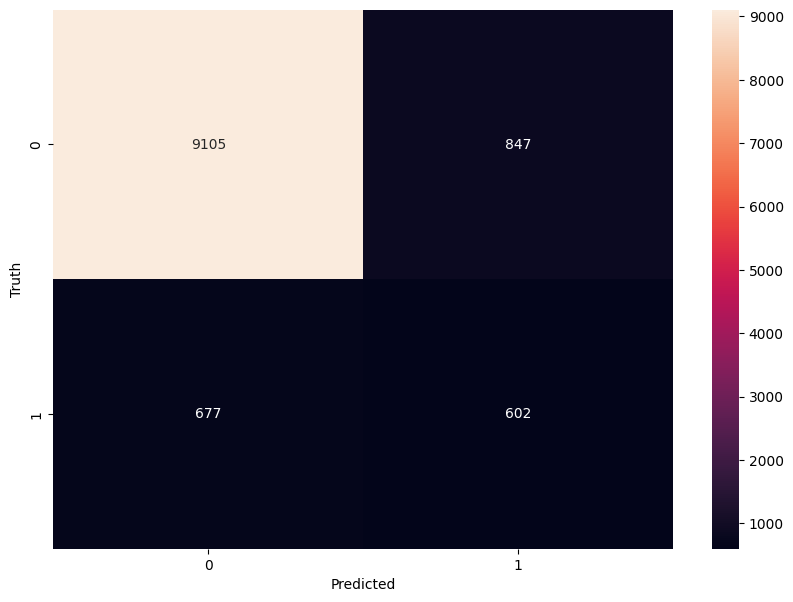

In [206]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [207]:
xTestDF = xTest.copy()
xTestDF.insert(len(xTestDF.columns), "yTest y", yTest)
xTestDF = xTestDF.reset_index(drop=True)
xTestDF.head(15)

,age,marital,education,balance,contact,month,duration,pdays,previous,poutcome,yTest y
0,4,1,2,366,2,5,324,106,1,2,1
1,4,2,1,216,2,2,173,-1,0,0,0
2,5,1,0,1021,0,6,13,-1,0,0,0
3,5,1,3,0,0,5,330,-1,0,0,0
4,2,1,1,236,0,5,554,-1,0,0,0
5,3,1,2,0,2,7,128,-1,0,0,0
6,3,3,2,0,1,7,185,-1,0,0,0
7,4,3,3,8823,0,5,378,-1,0,0,0
8,4,3,2,312,2,2,369,-1,0,0,0
9,2,3,2,331,1,8,170,-1,0,0,1


In [208]:
xTestDF.insert(len(xTestDF.columns), "Decision Tree", bank_dt_df)
xTestDF.head(20)

,age,marital,education,balance,contact,month,duration,pdays,previous,poutcome,yTest y,Decision Tree
0,4,1,2,366,2,5,324,106,1,2,1,0
1,4,2,1,216,2,2,173,-1,0,0,0,0
2,5,1,0,1021,0,6,13,-1,0,0,0,0
3,5,1,3,0,0,5,330,-1,0,0,0,0
4,2,1,1,236,0,5,554,-1,0,0,0,0
5,3,1,2,0,2,7,128,-1,0,0,0,0
6,3,3,2,0,1,7,185,-1,0,0,0,0
7,4,3,3,8823,0,5,378,-1,0,0,0,0
8,4,3,2,312,2,2,369,-1,0,0,0,1
9,2,3,2,331,1,8,170,-1,0,0,1,0


### Random Forest

In [209]:
from sklearn.ensemble import RandomForestClassifier

index : 98 
Accuracy : 0.9038375923782388


Text(0, 0.5, 'Testing Accuracy')

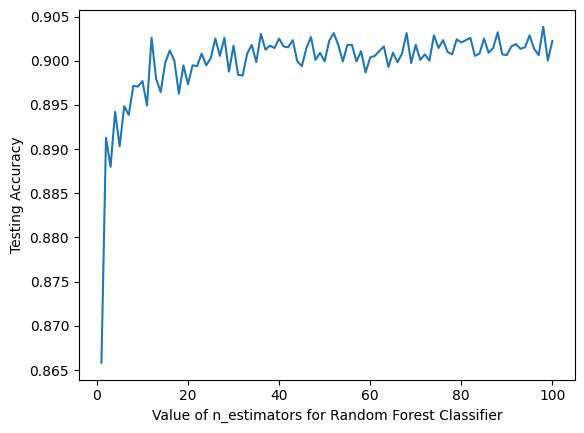

In [210]:
scores =[]
maxAccuracy = 0
maxIndex = 0
for i,k in enumerate(range(1, 101)):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(xTrain, yTrain)
    rf_pred = rfc.predict(xTest)
    scores.append(accuracy_score(yTest, rf_pred))

for i, x in enumerate(scores):
    if i == 0:
        maxAccuracy = x
        maxIndex = i+1
    if x > maxAccuracy:
        maxAccuracy = x
        maxIndex = i+1

print(f"index : {maxIndex} \nAccuracy : {maxAccuracy}")

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 101), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [211]:
model = RandomForestClassifier(n_estimators=maxIndex)
model.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=98)

In [212]:
model.score(xTest,yTest)

0.901878728519277

In [213]:
rf_pred = model.predict(xTest)

In [214]:
rfAccuracy = accuracy_score(yTest,rf_pred)
rfFscore = f1_score(yTest,rf_pred, average = "weighted")
print(f"The accuracy of Random Forest is {rfAccuracy}")
print(f"The F score of Random Forest is {rfFscore}")

The accuracy of Random Forest is 0.901878728519277
The F score of Random Forest is 0.895135839436307


In [215]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,rf_pred)
cm

array([[9572,  380],
       [ 722,  557]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

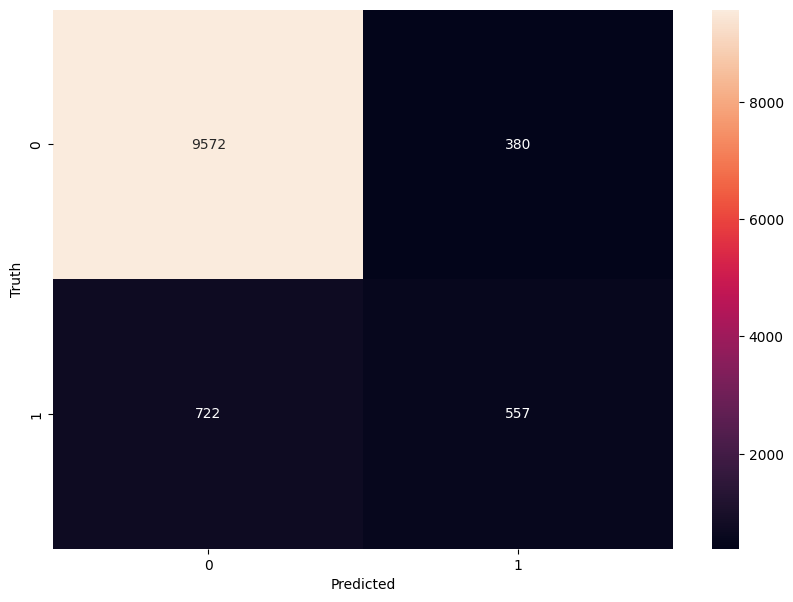

In [216]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [217]:
bank_rf_df = pd.DataFrame(data = rf_pred, columns = ["y"])
bank_rf_df.head(15)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [218]:
xTestDF.insert(len(xTestDF.columns), "Random Forest", bank_rf_df)
xTestDF.head(20)

,age,marital,education,balance,contact,month,duration,pdays,previous,poutcome,yTest y,Decision Tree,Random Forest
0,4,1,2,366,2,5,324,106,1,2,1,0,0
1,4,2,1,216,2,2,173,-1,0,0,0,0,0
2,5,1,0,1021,0,6,13,-1,0,0,0,0,0
3,5,1,3,0,0,5,330,-1,0,0,0,0,0
4,2,1,1,236,0,5,554,-1,0,0,0,0,0
5,3,1,2,0,2,7,128,-1,0,0,0,0,0
6,3,3,2,0,1,7,185,-1,0,0,0,0,0
7,4,3,3,8823,0,5,378,-1,0,0,0,0,0
8,4,3,2,312,2,2,369,-1,0,0,0,1,0
9,2,3,2,331,1,8,170,-1,0,0,1,0,0


### K-Nearest-Neighbour Classification

In [219]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#Finding the optimal k from 1-30
kRange = range(1,31)

scores = []

for kValue in kRange:
    knnClass = KNeighborsClassifier(n_neighbors = kValue)
    knnClass.fit(xTrain,yTrain)
    knn_pred= knnClass.predict(xTest)
    scores.append(metrics.accuracy_score(yTest,knn_pred))
    
maxKAccuracy = 0
maxKValue = 0

for i, x in enumerate(scores):
    if i == 0:
        maxKAccuracy = x
        maxKValue = i+1
    if x > maxKAccuracy:
        maxKAccuracy = x
        maxKValue = i+1

print(f"K value : {maxKValue} \nAccuracy : {maxKAccuracy}")

K value : 24 
Accuracy : 0.8883447600391773


Text(0, 0.5, 'Testing Accuracy')

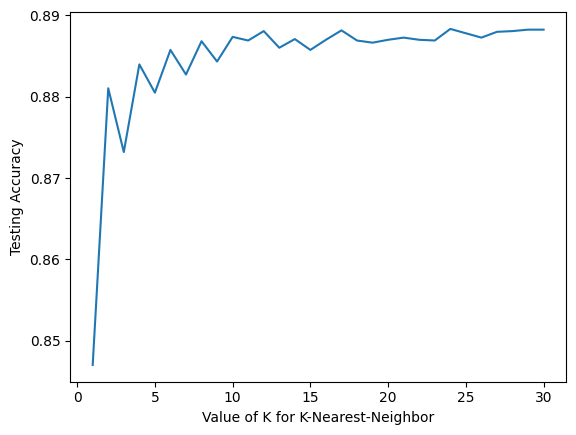

In [220]:
%matplotlib inline

plt.plot(kRange,scores)
plt.xlabel("Value of K for K-Nearest-Neighbor")
plt.ylabel("Testing Accuracy")

In [221]:
knnClass = KNeighborsClassifier(n_neighbors = maxKValue)
knnClass.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=24)

Select maxKValue of nearest neighbour with the highest accuracy

In [222]:
knnPredicted = knnClass.predict(xTest)
print(knnPredicted)

[0 0 0 ... 0 0 0]


In [223]:
knnAccuracy = accuracy_score(yTest,knnPredicted)
knnFscore = f1_score(yTest,knnPredicted,average = "weighted")
print(f"The accuracy of K-Nearest-Neighbour is {knnAccuracy}")
print(f"The F score of K-Nearest-Neighbour is {knnFscore}")

The accuracy of K-Nearest-Neighbour is 0.8883447600391773
The F score of K-Nearest-Neighbour is 0.865183996899806


In [224]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,knnPredicted)
cm

array([[9724,  228],
       [1026,  253]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

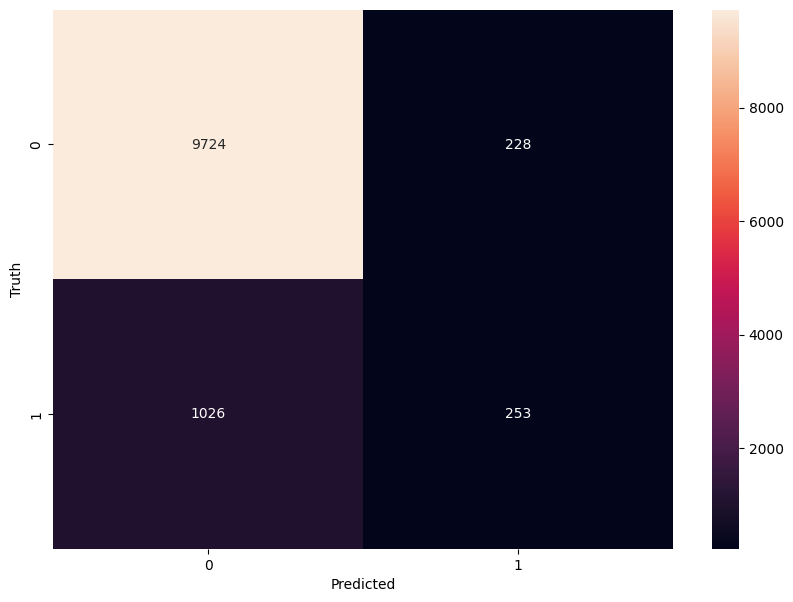

In [225]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [226]:
knnPredictedDF = pd.DataFrame(data = knnPredicted, columns = ["y"])
knnPredictedDF.head(10)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [227]:
xTestDF.insert(len(xTestDF.columns), "K-Nearest-Neighbors", knnPredictedDF)
xTestDF.head(20)

,age,marital,education,balance,contact,month,duration,pdays,previous,poutcome,yTest y,Decision Tree,Random Forest,K-Nearest-Neighbors
0,4,1,2,366,2,5,324,106,1,2,1,0,0,0
1,4,2,1,216,2,2,173,-1,0,0,0,0,0,0
2,5,1,0,1021,0,6,13,-1,0,0,0,0,0,0
3,5,1,3,0,0,5,330,-1,0,0,0,0,0,0
4,2,1,1,236,0,5,554,-1,0,0,0,0,0,0
5,3,1,2,0,2,7,128,-1,0,0,0,0,0,0
6,3,3,2,0,1,7,185,-1,0,0,0,0,0,0
7,4,3,3,8823,0,5,378,-1,0,0,0,0,0,0
8,4,3,2,312,2,2,369,-1,0,0,0,1,0,0
9,2,3,2,331,1,8,170,-1,0,0,1,0,0,0


### Support Vector Machines

In [228]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf",random_state = 1)
clf.fit(xTrain,yTrain)

SVC(random_state=1)

In [229]:
svm_pred = clf.predict(xTest)
print(svm_pred)

[0 0 0 ... 0 0 0]


In [230]:
svmAccuracy = accuracy_score(yTest,svm_pred)
svmFscore = f1_score(yTest,svm_pred,average = "weighted")
print(f"The accuracy of Support Vector Machines is {svmAccuracy}")
print(f"The F score of Support Vector Machines is {svmFscore}")

The accuracy of Support Vector Machines is 0.8867420532454813
The F score of Support Vector Machines is 0.8359703837346522


In [231]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,svm_pred)
cm

array([[9941,   11],
       [1261,   18]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

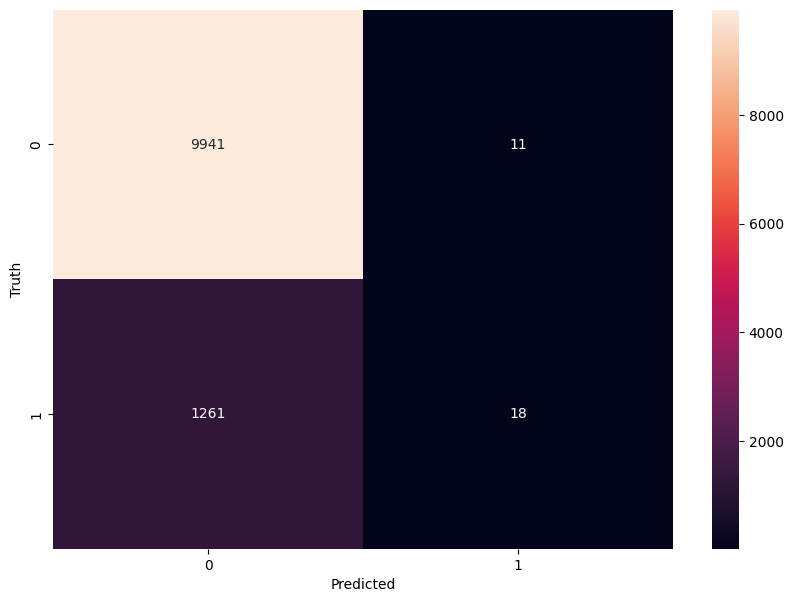

In [232]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [233]:
bank_svm_df = pd.DataFrame(data = svm_pred, columns = ["y"])
bank_svm_df.head(15)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [234]:
xTestDF.insert(len(xTestDF.columns), "Support Vector Machines", bank_svm_df)
xTestDF.head(20)

,age,marital,education,balance,contact,month,duration,pdays,previous,poutcome,yTest y,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines
0,4,1,2,366,2,5,324,106,1,2,1,0,0,0,0
1,4,2,1,216,2,2,173,-1,0,0,0,0,0,0,0
2,5,1,0,1021,0,6,13,-1,0,0,0,0,0,0,0
3,5,1,3,0,0,5,330,-1,0,0,0,0,0,0,0
4,2,1,1,236,0,5,554,-1,0,0,0,0,0,0,0
5,3,1,2,0,2,7,128,-1,0,0,0,0,0,0,0
6,3,3,2,0,1,7,185,-1,0,0,0,0,0,0,0
7,4,3,3,8823,0,5,378,-1,0,0,0,0,0,0,0
8,4,3,2,312,2,2,369,-1,0,0,0,1,0,0,0
9,2,3,2,331,1,8,170,-1,0,0,1,0,0,0,0


### Neural Network

In [235]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(128,), random_state=1, max_iter = 1000)
clf.fit(xTrain,yTrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128,), max_iter=1000,
              random_state=1, solver='lbfgs')

In [236]:
nn_pred = clf.predict(xTest)
print(nn_pred)

[0 0 0 ... 0 0 0]


In [237]:
nnAccuracy = accuracy_score(yTest,nn_pred)
nnFscore = f1_score(yTest,nn_pred,average = "weighted")
print(f"The accuracy of Neutral Network is {nnAccuracy}")
print(f"The F score of Neural Network is {nnFscore}")

The accuracy of Neutral Network is 0.8805983438696465
The F score of Neural Network is 0.8569765955715795


In [238]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,nn_pred)
cm

array([[9668,  284],
       [1057,  222]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

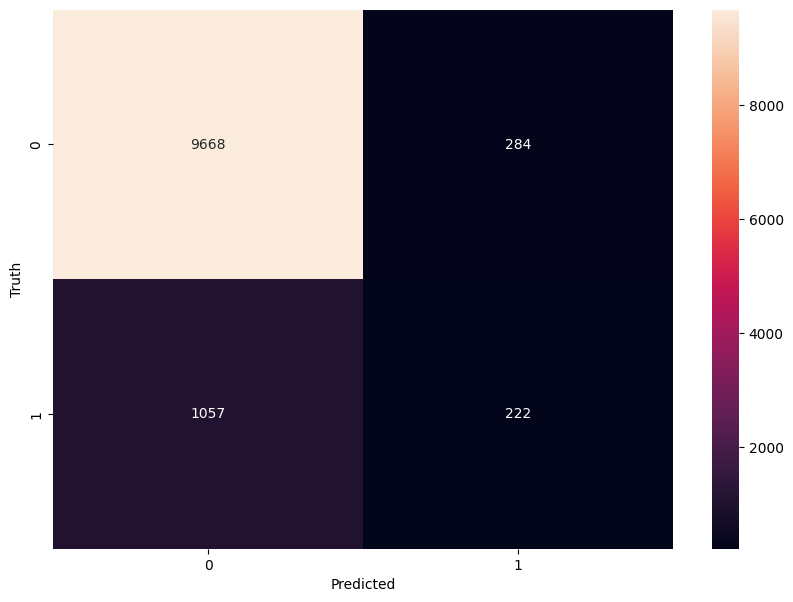

In [239]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [240]:
bank_nn_df = pd.DataFrame(data = nn_pred, columns = ["y"])
bank_nn_df.head(15)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [241]:
xTestDF.insert(len(xTestDF.columns), "Neural Network", bank_nn_df)
xTestDF.head(20)

,age,marital,education,balance,contact,month,duration,pdays,previous,poutcome,yTest y,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines,Neural Network
0,4,1,2,366,2,5,324,106,1,2,1,0,0,0,0,0
1,4,2,1,216,2,2,173,-1,0,0,0,0,0,0,0,0
2,5,1,0,1021,0,6,13,-1,0,0,0,0,0,0,0,0
3,5,1,3,0,0,5,330,-1,0,0,0,0,0,0,0,0
4,2,1,1,236,0,5,554,-1,0,0,0,0,0,0,0,0
5,3,1,2,0,2,7,128,-1,0,0,0,0,0,0,0,0
6,3,3,2,0,1,7,185,-1,0,0,0,0,0,0,0,0
7,4,3,3,8823,0,5,378,-1,0,0,0,0,0,0,0,0
8,4,3,2,312,2,2,369,-1,0,0,0,1,0,0,0,0
9,2,3,2,331,1,8,170,-1,0,0,1,0,0,0,0,0


# Evaluation Metrics of Machine Learning Algorithms

In [242]:
dfMetrics = pd.DataFrame({ "KNN" : [knnAccuracy, knnFscore],
                   "Random Forest" : [rfAccuracy, rfFscore],
                   "Decision Tree" : [dtAccuracy, dtFscore], 
                   "SVM" : [svmAccuracy,svmFscore],
                   "NN" : [nnAccuracy,nnFscore]} , columns = ["KNN" , "Random Forest" , "Decision Tree", "SVM", "NN"], 
                  index = ["Accuracy", "Fscore"])
dfMetrics

,KNN,Random Forest,Decision Tree,SVM,NN
Accuracy,0.888345,0.901879,0.864304,0.886742,0.880598
Fscore,0.865184,0.895136,0.867948,0.835970,0.856977
